### Problem Statement

#### Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets: Loanee Information (Demographic data like age, Identity proof etc.) Loan Information (Disbursal details, loan to value ratio etc.) Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.) Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

#### Importing the required packages

In [27]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Reading the data i.e., train and test data

In [2]:
train = pd.read_csv(r"G:\R workplace\Data Files\lt-vehicle-loan-default-prediction\train.csv",na_values="  ")

### Printing first dew rows of train and test data

In [3]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
print(train.shape)                # Shape of the data


(233154, 41)


In [5]:
train.nunique()                    # Unique elements in each variables

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

### Column names of train and test data

In [6]:
train.keys()

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
print(len(train.keys()))

41


### Finding out the details of train and test data

In [8]:
train.describe(include="all")

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,225493,233154,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154,233154,233154.000000,233154.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,294,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-1988,Self employed,31-10-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0yrs 0mon,0yrs 0mon,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,127635,8826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119373,119127,NaN,NaN
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,NaN,NaN,NaN,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,NaN,NaN,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,NaN,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,NaN,NaN,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,NaN,NaN,NaN,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,NaN,NaN,NaN,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,NaN,NaN,NaN,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+0

### Checking the data types of the columns

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

### Removing unwanted column UniqueID form train and test data

In [10]:
train = train.drop("UniqueID",axis=1)

### Renaming some column names for train and test data

#### 1. For Train data

In [11]:
train.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [12]:
column_indices = [7,8,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]

In [13]:
new_names = ['DOB','Employment_type','Bureau_score','Bureau_score_description','Cnt_total_loans_pri','Cnt_active_loans_pri','Cnt_default_acct_pri','Current_balance_pri','Sanctioned_amount_pri','Disbursed_Amount_pri','Cnt_total_loans_sec','Cnt_active_loans_sec','Cnt_default_acct_sec','Current_balance_sec','Sanctioned_amount_sec','Disbursed_Amount_sec','EMI_amount_pri','EMI_amount_sec','New_acc_last_six_months','Delinquent_acc_last_six_months','Avg_loan_tenure','Credit_history_length','No_inquiries']

In [14]:
old_names = train.columns[column_indices]     

In [15]:
train.rename(columns=dict(zip(old_names,new_names)), inplace=True)

In [16]:
train.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DOB,Employment_type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score,Bureau_score_description,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,loan_default
0,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


### Removing the text words from the Avg. loan tenure and credit history length columns of both train and test data

#### 1. For train data

In [17]:
train.Avg_loan_tenure = train.Avg_loan_tenure.str.replace('\D+','.').str.strip(".")

In [18]:
train.Avg_loan_tenure.head()

0     0.0
1    1.11
2     0.0
3     0.8
4     0.0
Name: Avg_loan_tenure, dtype: object

In [19]:
train.Credit_history_length = train.Credit_history_length.str.replace('\D+','.').str.strip(".")
train.Credit_history_length.head()

0     0.0
1    1.11
2     0.0
3     1.3
4     0.0
Name: Credit_history_length, dtype: object

### Dealing with the NULL values

#### 1. For train data

In [20]:
train.isnull().sum()

disbursed_amount                     0
asset_cost                           0
ltv                                  0
branch_id                            0
supplier_id                          0
manufacturer_id                      0
Current_pincode_ID                   0
DOB                                  0
Employment_type                   7661
DisbursalDate                        0
State_ID                             0
Employee_code_ID                     0
MobileNo_Avl_Flag                    0
Aadhar_flag                          0
PAN_flag                             0
VoterID_flag                         0
Driving_flag                         0
Passport_flag                        0
Bureau_score                         0
Bureau_score_description             0
Cnt_total_loans_pri                  0
Cnt_active_loans_pri                 0
Cnt_default_acct_pri                 0
Current_balance_pri                  0
Sanctioned_amount_pri                0
Disbursed_Amount_pri     

In [21]:
train.Employment_type.describe()    # Checking the data type of the column and most occured value in the column 

count            225493
unique                2
top       Self employed
freq             127635
Name: Employment_type, dtype: object

In [22]:
train.Employment_type = train.Employment_type.fillna("Self employed")

### Converting the Date of Birth column into Age

In [28]:
from datetime import date, datetime

In [29]:
train.DOB.head()

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-09-12
Name: DOB, dtype: datetime64[ns]

In [34]:
# Converting the DOB column to daytime format
train["DOB"] = pd.to_datetime(train["DOB"]).dt.date



In [35]:
# Doing the math for substracting the old date with current date
`
train["Age"] = pd.datetime.now().date() - train["DOB"]

In [36]:
# Converting the column into String
train["Age"] = train["Age"].astype(str)

train["Age"].head()

# Removing the unwanted data from the column except for the numbers
train["Age"] = train["Age"].apply(lambda x : x[:-24])



In [37]:
# Converting the DOB column into numeric as we want the Age columns into age(years) which currently present in days
train["Age"] = pd.to_numeric(train["Age"])

# Converting the days to ages
train["Age"] = train["Age"]/ 365

# Rounding off the values
train["Age"] = train["Age"].apply(np.floor).astype("int64")

In [38]:
train.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,No_inquiries,loan_default,Age
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,34.957732
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,9.829255
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,18.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,27.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,33.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,70.000000


#### Removing DOB and disbursal date column

In [39]:
train = train.drop(["DOB"],axis=1)

In [40]:
train = train.drop(["DisbursalDate"],axis=1)

### Converting some useful columns into category

#### For train data

In [41]:
train.branch_id = train.branch_id.astype("category")
train.supplier_id = train.supplier_id.astype("category")
train.manufacturer_id = train.manufacturer_id.astype("category")
train.Current_pincode_ID = train.Current_pincode_ID.astype("category")
train.State_ID = train.State_ID.astype("category")
train.Employee_code_ID = train.Employee_code_ID.astype("category")
train.Aadhar_flag = train.Aadhar_flag.astype("category")
train.PAN_flag = train.PAN_flag.astype("category")
train.VoterID_flag = train.VoterID_flag.astype("category")
train.Driving_flag = train.Driving_flag.astype("category")
train.Passport_flag = train.Passport_flag.astype("category")
train.MobileNo_Avl_Flag = train.MobileNo_Avl_Flag.astype("category")

In [42]:
train.Avg_loan_tenure = train.Avg_loan_tenure.astype("float")
train.Credit_history_length = train.Credit_history_length.astype("float")

In [43]:
train.loan_default = train.loan_default.astype("category")

### Checking whether the data is normally distributed from mean - median

In [44]:
train.describe(include="all")

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score,Bureau_score_description,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,loan_default,Age
count,233154.000000,2.331540e+05,233154.000000,233154.0,233154.0,233154.0,233154.0,233154,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000
unique,NaN,NaN,NaN,82.0,2953.0,11.0,6698.0,2,22.0,3270.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
top,NaN,NaN,NaN,2.0,18317.0,86.0,2578.0,Self employed,4.0,2546.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
freq,NaN,NaN,NaN,13138.0,1432.0,109534.0,1880.0,135296,44870.0,628.0,233154.0,195924.0,215533.0,199360.0,227735.0,232658.0,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182543.0,NaN
mean,54356.993528,7.586507e+04,74.746530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.715615,1.327379,0.206615,NaN,34.957732
std,12971.314171,1.894478e+04,11.456636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.252152,2.367571,0.706498,NaN,9.829255
min,13320.000000,3.700000e+04,10.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
25%,47145.000000,6.571700e+04,68.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,27.000000
50%,53803.000000,7.094600e+04,76.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,33.000000
75%,60413.000000,7.920175e+04,83.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,NaN,42.000000


### Exploratory Data Analysis

#### EDA on categorical columns

#### 1. No. of loan default in the data 

In [45]:
loan = np.unique(train.loan_default)
count = train.loan_default.value_counts()

Text(0.5, 1.0, 'No. of loans approved(1) and rejected(0) count')

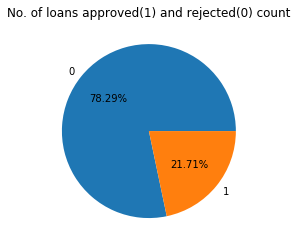

In [46]:
plt.pie(count, labels=loan , autopct="%1.2f%%")
plt.title("No. of loans approved(1) and rejected(0) count")

#### 2. No. of loans getting approved or rejected based on age

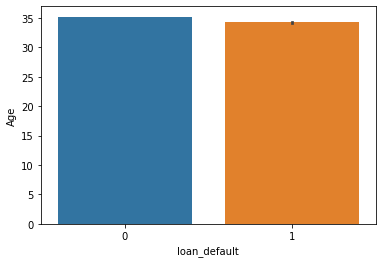

In [47]:
sns.barplot(train.loan_default , train.Age)

#### 3. Displaying the distribution of the data using histogram

In [48]:
train.describe(include="all")

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score,Bureau_score_description,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,loan_default,Age
count,233154.000000,2.331540e+05,233154.000000,233154.0,233154.0,233154.0,233154.0,233154,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000
unique,NaN,NaN,NaN,82.0,2953.0,11.0,6698.0,2,22.0,3270.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
top,NaN,NaN,NaN,2.0,18317.0,86.0,2578.0,Self employed,4.0,2546.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
freq,NaN,NaN,NaN,13138.0,1432.0,109534.0,1880.0,135296,44870.0,628.0,233154.0,195924.0,215533.0,199360.0,227735.0,232658.0,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182543.0,NaN
mean,54356.993528,7.586507e+04,74.746530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.715615,1.327379,0.206615,NaN,34.957732
std,12971.314171,1.894478e+04,11.456636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.252152,2.367571,0.706498,NaN,9.829255
min,13320.000000,3.700000e+04,10.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
25%,47145.000000,6.571700e+04,68.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,27.000000
50%,53803.000000,7.094600e+04,76.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,33.000000
75%,60413.000000,7.920175e+04,83.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,NaN,42.000000


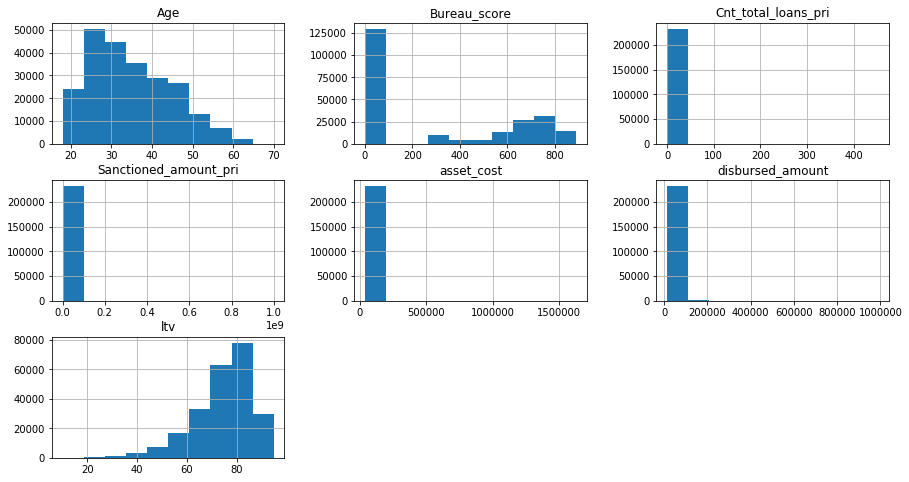

In [49]:
features = ["disbursed_amount","asset_cost",'ltv','Age','Bureau_score','Cnt_total_loans_pri','Sanctioned_amount_pri']
train[features].hist(figsize=(15, 8));

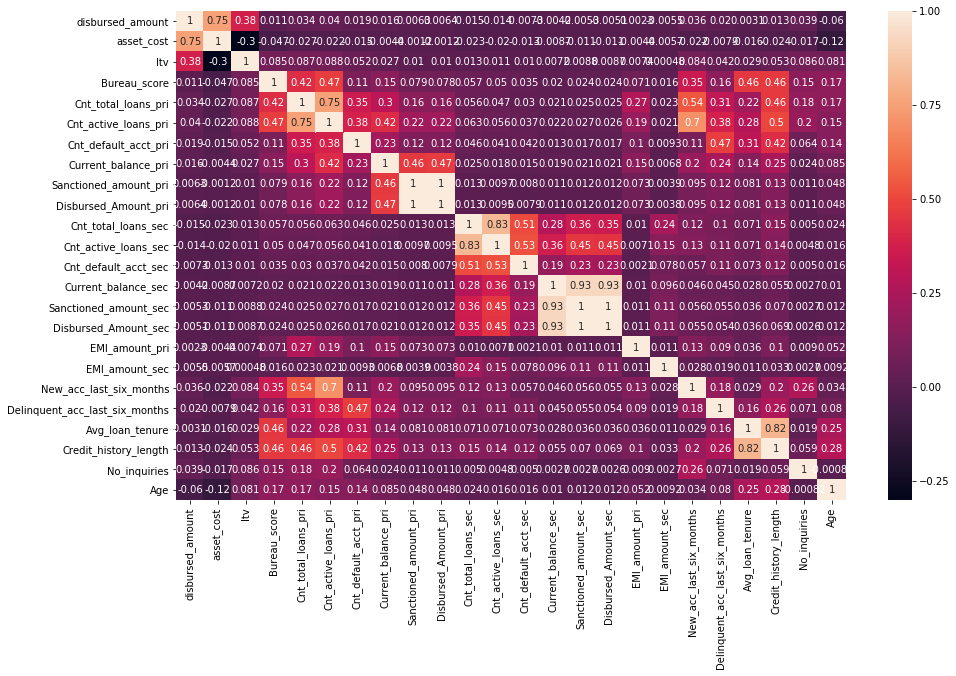

In [50]:
corr = train.corr()
#sns.set_context("notebook", font_scale=1.0)
plt.figure(figsize=(15,9))
a = sns.heatmap(corr, annot=True)

#### From above histograms I can see that values present in the dataset are not normally distributed. Few columns are having very less value range as compared to others. Hence I'll try to rescale the data so that all the values of the data will be in the same range 

#### Taking numerical columns in one dataset

In [51]:
train.describe(include="all")

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score,Bureau_score_description,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,loan_default,Age
count,233154.000000,2.331540e+05,233154.000000,233154.0,233154.0,233154.0,233154.0,233154,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.0,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000
unique,NaN,NaN,NaN,82.0,2953.0,11.0,6698.0,2,22.0,3270.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
top,NaN,NaN,NaN,2.0,18317.0,86.0,2578.0,Self employed,4.0,2546.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
freq,NaN,NaN,NaN,13138.0,1432.0,109534.0,1880.0,135296,44870.0,628.0,233154.0,195924.0,215533.0,199360.0,227735.0,232658.0,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182543.0,NaN
mean,54356.993528,7.586507e+04,74.746530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.715615,1.327379,0.206615,NaN,34.957732
std,12971.314171,1.894478e+04,11.456636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.252152,2.367571,0.706498,NaN,9.829255
min,13320.000000,3.700000e+04,10.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
25%,47145.000000,6.571700e+04,68.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,27.000000
50%,53803.000000,7.094600e+04,76.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,33.000000
75%,60413.000000,7.920175e+04,83.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,NaN,42.000000


In [52]:
train_num = train.iloc[:,np.r_[0:3,16,18:37,38]]

In [53]:
train_num.head()

,disbursed_amount,asset_cost,ltv,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,Age
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,35
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,34
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,34
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,25
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,42


#### Checking the skewness in the data

In [55]:
train_num.skew()

disbursed_amount                    4.492240
asset_cost                          6.133485
ltv                                -1.075766
Bureau_score                        0.445150
Cnt_total_loans_pri                 9.744845
Cnt_active_loans_pri                5.371850
Cnt_default_acct_pri                7.512927
Current_balance_pri                29.425813
Sanctioned_amount_pri             323.697212
Disbursed_Amount_pri              322.541495
Cnt_total_loans_sec                27.986090
Cnt_active_loans_sec               30.599510
Cnt_default_acct_sec               24.129271
Current_balance_sec               108.506295
Sanctioned_amount_sec              75.254932
Disbursed_Amount_sec               75.764252
EMI_amount_pri                     69.916156
EMI_amount_sec                    153.806369
New_acc_last_six_months             4.839326
Delinquent_acc_last_six_months      6.641996
Avg_loan_tenure                     3.325865
Credit_history_length               3.001651
No_inquiri

In [56]:
train_num.describe()

,disbursed_amount,asset_cost,ltv,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Current_balance_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Current_balance_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,Age
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.715615,1.327379,0.206615,34.957732
std,12971.314171,1.894478e+04,11.456636,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.252152,2.367571,0.706498,9.829255
min,13320.000000,3.700000e+04,10.030000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,47145.000000,6.571700e+04,68.880000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
50%,53803.000000,7.094600e+04,76.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,60413.000000,7.920175e+04,83.670000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,42.000000
max,990572.000000,1.628992e+06,95.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,30.900000,39.000000,36.000000,70.000000


#### Taking out the variables who are having negative values

In [57]:
train_negative = train.loc[:,["Current_balance_sec","Current_balance_pri"]]

In [58]:
train_num = train_num.drop(["Current_balance_sec","Current_balance_pri"], axis=1)

In [59]:
train_num.head()

,disbursed_amount,asset_cost,ltv,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,Age
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,35
1,47145,65550,73.23,598,1,1,1,50200,50200,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,34
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,34
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,25
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,42


#### Applying log transformation to the numeric columns except for those column which are having negative values i.e., (Current_balance_sec, Current_balance_pri)

In [60]:
train_log = train_num.apply(lambda x : skew(x.dropna()))
train_log = train_log[train_log > 1] 

train_num[train_log.index] = np.log1p(train_num[train_log.index])

In [61]:
train_num.head()

,disbursed_amount,asset_cost,ltv,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,Age
0,10.831292,10.975088,89.55,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,35
1,10.761004,11.090584,73.23,598,0.693147,0.693147,0.693147,10.82379,10.82379,0.0,0.0,0.0,0.0,0.0,7.596894,0.0,0.0,0.693147,0.746688,0.746688,0.000000,34
2,10.883298,11.024530,89.63,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,34
3,10.959784,11.099136,88.48,305,1.386294,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,3.465736,0.0,0.0,0.000000,0.587787,0.832909,0.693147,25
4,10.866261,11.007104,88.39,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,42


#### Applying Min-Max Scalar to those columns whose having negative values present i.e., (Current_balance_sec, Current_balance_pri)

In [62]:
train_negative = (train_negative - train_negative.min()) / (train_negative.max() - train_negative.min())

In [63]:
train_negative.describe()

,Current_balance_sec,Current_balance_pri
count,233154.000000,233154.000000
mean,0.015846,0.066318
std,0.004650,0.009130
min,0.000000,0.000000
25%,0.015698,0.064710
50%,0.015698,0.064710
75%,0.015698,0.065049
max,1.000000,1.000000


#### Checking the skewness again

In [64]:
train_num.skew()

disbursed_amount                  -0.454610
asset_cost                         1.279172
ltv                               -1.075766
Bureau_score                       0.445150
Cnt_total_loans_pri                1.033983
Cnt_active_loans_pri               1.165160
Cnt_default_acct_pri               3.166314
Sanctioned_amount_pri              0.481521
Disbursed_Amount_pri               0.487272
Cnt_total_loans_sec                8.779581
Cnt_active_loans_sec              10.303634
Cnt_default_acct_sec              15.454116
Sanctioned_amount_sec              7.989916
Disbursed_Amount_sec               8.052277
EMI_amount_pri                     0.940679
EMI_amount_sec                    10.682287
New_acc_last_six_months            2.052650
Delinquent_acc_last_six_months     3.723389
Avg_loan_tenure                    1.250970
Credit_history_length              1.088281
No_inquiries                       3.007293
Age                                0.608472
dtype: float64

#### Taking the categorical columns from the train dataset

In [65]:
train_cat = train.iloc[:,np.r_[3:16,17,37]]

In [66]:
train_cat.head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score_description,loan_default
0,67,22807,45,1441,Salaried,6,1998,1,1,0,0,0,0,No Bureau History Available,0
1,67,22807,45,1502,Self employed,6,1998,1,1,0,0,0,0,I-Medium Risk,1
2,67,22807,45,1497,Self employed,6,1998,1,1,0,0,0,0,No Bureau History Available,0
3,67,22807,45,1501,Self employed,6,1998,1,1,0,0,0,0,L-Very High Risk,1
4,67,22807,45,1495,Self employed,6,1998,1,1,0,0,0,0,No Bureau History Available,1


#### Applying Label Encoding on categorical columns

In [67]:
le = LabelEncoder()

In [68]:
train_cat.Employment_type = le.fit_transform(train_cat.Employment_type)
train_cat.Bureau_score_description = le.fit_transform(train_cat.Bureau_score_description)

G:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [69]:
train_cat.head()

,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score_description,loan_default
0,67,22807,45,1441,0,6,1998,1,1,0,0,0,0,13,0
1,67,22807,45,1502,1,6,1998,1,1,0,0,0,0,8,1
2,67,22807,45,1497,1,6,1998,1,1,0,0,0,0,13,0
3,67,22807,45,1501,1,6,1998,1,1,0,0,0,0,11,1
4,67,22807,45,1495,1,6,1998,1,1,0,0,0,0,13,1


In [70]:
train_cat.Employment_type = train_cat.Employment_type.astype("category")
train_cat.Bureau_score_description = train_cat.Bureau_score_description.astype("category")

In [71]:
train_cat.shape

(233154, 15)

In [72]:
train_num.shape

(233154, 22)

#### Joining above converted category and numerical column together

In [73]:
train_new = pd.concat([train_num , train_cat] , axis=1)

In [74]:
train_new.head()

,disbursed_amount,asset_cost,ltv,Bureau_score,Cnt_total_loans_pri,Cnt_active_loans_pri,Cnt_default_acct_pri,Sanctioned_amount_pri,Disbursed_Amount_pri,Cnt_total_loans_sec,Cnt_active_loans_sec,Cnt_default_acct_sec,Sanctioned_amount_sec,Disbursed_Amount_sec,EMI_amount_pri,EMI_amount_sec,New_acc_last_six_months,Delinquent_acc_last_six_months,Avg_loan_tenure,Credit_history_length,No_inquiries,Age,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,Bureau_score_description,loan_default
0,10.831292,10.975088,89.55,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,35,67,22807,45,1441,0,6,1998,1,1,0,0,0,0,13,0
1,10.761004,11.090584,73.23,598,0.693147,0.693147,0.693147,10.82379,10.82379,0.0,0.0,0.0,0.0,0.0,7.596894,0.0,0.0,0.693147,0.746688,0.746688,0.000000,34,67,22807,45,1502,1,6,1998,1,1,0,0,0,0,8,1
2,10.883298,11.024530,89.63,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,34,67,22807,45,1497,1,6,1998,1,1,0,0,0,0,13,0
3,10.959784,11.099136,88.48,305,1.386294,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,3.465736,0.0,0.0,0.000000,0.587787,0.832909,0.693147,25,67,22807,45,1501,1,6,1998,1,1,0,0,0,0,11,1
4,10.866261,11.007104,88.39,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,42,67,22807,45,1495,1,6,1998,1,1,0,0,0,0,13,1


In [75]:
train_new.shape

(233154, 37)

### Creating train-test data

In [76]:
train_x = train_new.iloc[:,0:36]

In [77]:
train_y = train_new.iloc[:,-1]

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(train_x , train_y, test_size = .20, random_state=101)

In [79]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(186523, 36)
(46631, 36)
(186523,)
(46631,)


#### As I have cleaned and prepared data, I'll now build the model on it.

In [80]:
# Creating instances of the model
reg = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

#### Model No. 1

In [81]:
model1 = reg.fit(xtrain, ytrain)

G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
model1_pred = reg.predict(xtest)

In [84]:
model1_df = pd.DataFrame(model1_pred , ytest)
model1_df.head()

,0
loan_default,
0,0
1,0
0,0
0,0
0,0


In [85]:
conf1 = confusion_matrix(model1_pred , ytest)
conf1

array([[36505, 10126],
       [    0,     0]], dtype=int64)

In [86]:
sum(conf1.diagonal() / conf1.sum())*100            # checking an accuracy

78.2848319787266

In [95]:
print(classification_report(model1_pred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     46631
           1       0.00      0.00      0.00         0

    accuracy                           0.78     46631
   macro avg       0.50      0.39      0.44     46631
weighted avg       1.00      0.78      0.88     46631



G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### From above logistics regression model, all class 1 (default loans) data are predicted as non default. Also the precision and recall values are zero for class 1.

####  Model No. 2 Decision Tree Classifier 

In [87]:
model2 = tree.fit(xtrain, ytrain)

In [88]:
model2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
mod2_pred = tree.predict(xtest)

In [90]:
model2_df = pd.DataFrame(mod2_pred , ytest)
model2_df.head()

,0
loan_default,
0,0
1,0
0,0
0,0
0,1


In [91]:
conf2 = confusion_matrix(mod2_pred , ytest)
conf2

array([[28396,  7255],
       [ 8109,  2871]], dtype=int64)

In [92]:
sum(conf2.diagonal() / conf2.sum())*100            # checking an accuracy

67.05196114172975

In [94]:
print(classification_report(mod2_pred, ytest))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     35651
           1       0.28      0.26      0.27     10980

    accuracy                           0.67     46631
   macro avg       0.53      0.53      0.53     46631
weighted avg       0.66      0.67      0.67     46631



#### From above decision tree model, accuracy for class 1 (default loans) data is very low. Also the precision and recall values are also very low.

#### Model No. 3  Random Forest Classifier Model

In [237]:
model3 = forest.fit(xtrain, ytrain)

In [238]:
model3

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [239]:
mod3_pred = forest.predict(xtest)

In [240]:
mod3_df = pd.DataFrame(mod3_pred , ytest)
mod3_df.head()

,0
loan_default,
0,0
1,0
0,0
0,0
0,0


In [241]:
conf3 = confusion_matrix(mod3_pred , ytest)
conf3

array([[35021,  9344],
       [ 1484,   782]])

In [242]:
sum(conf3.diagonal() / conf3.sum())*100            # checking an accuracy

76.77939568098475

#### After building 3 models on three different machine learning models, I can see that the prediction for class 1 ie., to predict loans which are going to default is not very good. Most of them are getting predicted in class 0 i.e., being non default.

### Performing Feature Selection from Decision Tree

In [96]:
tree_select = tree.feature_importances_
tree_select

array([0.09939782, 0.09841144, 0.12480698, 0.03303526, 0.01523202,
       0.00845089, 0.00518889, 0.02146604, 0.02006787, 0.00195686,
       0.0007992 , 0.00063142, 0.00110081, 0.00126972, 0.02523068,
       0.00089853, 0.00793587, 0.0045201 , 0.02193608, 0.02586086,
       0.01111489, 0.09316164, 0.03194165, 0.07365808, 0.01905837,
       0.10813749, 0.01145566, 0.01468835, 0.08905686, 0.        ,
       0.00500857, 0.00562771, 0.00646814, 0.00307674, 0.00040198,
       0.00894651])

In [97]:
train_tree_columns = train_x.columns
train_tree_columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Bureau_score',
       'Cnt_total_loans_pri', 'Cnt_active_loans_pri', 'Cnt_default_acct_pri',
       'Sanctioned_amount_pri', 'Disbursed_Amount_pri', 'Cnt_total_loans_sec',
       'Cnt_active_loans_sec', 'Cnt_default_acct_sec', 'Sanctioned_amount_sec',
       'Disbursed_Amount_sec', 'EMI_amount_pri', 'EMI_amount_sec',
       'New_acc_last_six_months', 'Delinquent_acc_last_six_months',
       'Avg_loan_tenure', 'Credit_history_length', 'No_inquiries', 'Age',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_type', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'Bureau_score_description'],
      dtype='object')

In [98]:
featured_data = pd.DataFrame({"Columns":train_tree_columns,"Score":tree_select})
featured_data.sort_values("Score",ascending = False)

,Columns,Score
2,ltv,0.124807
25,Current_pincode_ID,0.108137
0,disbursed_amount,0.099398
1,asset_cost,0.098411
21,Age,0.093162
28,Employee_code_ID,0.089057
23,supplier_id,0.073658
3,Bureau_score,0.033035
22,branch_id,0.031942
19,Credit_history_length,0.025861


In [99]:
featured_x = train_new.iloc[:,[2,25,0,1,21,28,23,3,22,14,19,18,7,24,8]]    # Selecting first 15 variables with high importances.

#### Creating Train-Test split on selected variables

In [100]:
xtrain1 , xtest1, ytrain1, ytest1 = train_test_split(featured_x, train_y, test_size= .20, random_state=101)

#### Model No. 4 (Decision tree on selected features)

In [101]:
mod4 = tree.fit(xtrain1,ytrain1)

In [102]:
mod4_pred = tree.predict(xtest1)

In [103]:
conf4 = confusion_matrix(mod4_pred, ytest1)
conf4

array([[28342,  7258],
       [ 8163,  2868]], dtype=int64)

In [104]:
sum(conf4.diagonal() / conf4.sum())*100 

66.92972486114387

#### From above I can see that even if the selected features are taken into consideration for model building, the model is not giving good accuracy for class 1.

#### Hence keeping the problem statement in mind, to predict which vahicle loans are going to default.

In [105]:
train_new.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

#### As I can see there there very less observations for class 1 i.e., there less almost 21% clients present whose Loan is getting default.
#### This is the problem of Class Imbalance.

#### Increasing the observations of Class 1.

### Over Sampling

In [106]:
add = (train_new.loan_default == 1)
add = train_new[add]

In [107]:
train_new = pd.concat([train_new , add], axis=0)

In [108]:
train_new.loan_default.value_counts()

0    182543
1    101222
Name: loan_default, dtype: int64

#### Sampling the data and rebuilding the model on over-sampled data.

In [110]:
train_dup_x = train_new.iloc[:,0:36]
train_dup_y = train_new.iloc[:,-1]

In [111]:
ntrainx , ntestx, ntrainy, ntesty = train_test_split(train_dup_x, train_dup_y, test_size = .20 , random_state= 101)

#### Model No. 5  (Decision Tree On full features-over sampled)

In [124]:
mod5 = tree.fit(ntrainx, ntrainy)

In [125]:
mod5_pred = tree.predict(ntestx)

In [126]:
conf5 = confusion_matrix(mod5_pred , ntesty)        # Confusion Matrix
conf5

array([[27500,  2981],
       [ 8818, 17454]], dtype=int64)

In [127]:
sum(conf5.diagonal() / conf5.sum())*100    # Checking the accuracy

79.20990960830264

In [128]:
print(classification_report(mod5_pred, ntesty))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82     30481
           1       0.85      0.66      0.75     26272

    accuracy                           0.79     56753
   macro avg       0.81      0.78      0.79     56753
weighted avg       0.80      0.79      0.79     56753



#### Now the accuracy and classification report for both  the classes are good.

#### Model No. 6 (Random forest on full features-over sampled)

In [129]:
mod6 = forest.fit(ntrainx, ntrainy)

In [130]:
mod6_pred = forest.predict(ntestx)

In [131]:
conf6 = confusion_matrix(mod6_pred , ntesty)      # Confusion Matrix
conf6

array([[33083,  4961],
       [ 3235, 15474]], dtype=int64)

In [132]:
sum(conf6.diagonal() / conf6.sum())*100    # Checking the accuracy

85.55847267985834

In [133]:
print(classification_report(mod6_pred, ntesty))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     38044
           1       0.76      0.83      0.79     18709

    accuracy                           0.86     56753
   macro avg       0.83      0.85      0.84     56753
weighted avg       0.86      0.86      0.86     56753



#### Random Forest model is giving more accuracy and classification report score than decision tree.

#### Now finding the important features from the data which can help to find the client who are going to default on the loan and who are not. 

#### Model No 7 (Decision tree on Featured data-Over Sampled)

In [134]:
tree_features = tree.feature_importances_
tree_features

array([0.09527389, 0.0958046 , 0.13016615, 0.03373695, 0.01501445,
       0.00869656, 0.00518019, 0.0225877 , 0.01721676, 0.00150952,
       0.00070356, 0.00048854, 0.00067176, 0.00042874, 0.02645285,
       0.00075049, 0.00694835, 0.00468397, 0.02235377, 0.02676117,
       0.01067345, 0.09239359, 0.03120071, 0.0795297 , 0.01767002,
       0.10741639, 0.01059642, 0.01464964, 0.09141183, 0.        ,
       0.00537028, 0.00532575, 0.0060965 , 0.0026728 , 0.00035327,
       0.00920969])

In [135]:
train_feat_columns = train_dup_x.columns
train_feat_columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Bureau_score',
       'Cnt_total_loans_pri', 'Cnt_active_loans_pri', 'Cnt_default_acct_pri',
       'Sanctioned_amount_pri', 'Disbursed_Amount_pri', 'Cnt_total_loans_sec',
       'Cnt_active_loans_sec', 'Cnt_default_acct_sec', 'Sanctioned_amount_sec',
       'Disbursed_Amount_sec', 'EMI_amount_pri', 'EMI_amount_sec',
       'New_acc_last_six_months', 'Delinquent_acc_last_six_months',
       'Avg_loan_tenure', 'Credit_history_length', 'No_inquiries', 'Age',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment_type', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'Bureau_score_description'],
      dtype='object')

In [136]:
featured_data1 = pd.DataFrame({"Columns":train_feat_columns,"Score":tree_features})
featured_data1.sort_values("Score",ascending = False)

,Columns,Score
2,ltv,0.130166
25,Current_pincode_ID,0.107416
1,asset_cost,0.095805
0,disbursed_amount,0.095274
21,Age,0.092394
28,Employee_code_ID,0.091412
23,supplier_id,0.079530
3,Bureau_score,0.033737
22,branch_id,0.031201
19,Credit_history_length,0.026761


#### Selecting first 13 variables with high importances.

In [137]:
featured_tree_x = train_new.iloc[:,[2,25,0,21,28,23,22,19,14,7,12,24,27]]

#### Train Test split on featured data

In [138]:
xtrain2 , xtest2, ytrain2, ytest2 = train_test_split(featured_tree_x, train_dup_y, test_size= .20, random_state=101)

#### Model No. 7 (Decision Tree on featured, over sampled data)

In [143]:
mod7 = tree.fit(xtrain2 , ytrain2)

In [144]:
mod7_pred = tree.predict(xtest2)

In [145]:
conf7 = confusion_matrix(mod7_pred , ytest2)
conf7

array([[27305,  2973],
       [ 9013, 17462]], dtype=int64)

In [146]:
sum(conf7.diagonal() / conf7.sum())*100    # Checking the accuracy

78.88041160819692

#### After adding and removing various features by using technique feature importance and using correlation matrix. I'll use Ada-boost classifier technique to improve the model accuracy.

#### Model No. 8 (Ada boost classifier on model no 7)

In [147]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 20)     # Ada-boost classifier using Decision Tree

In [148]:
mod8 = adaboost.fit(xtrain2, ytrain2)

In [149]:
mod8_pred = adaboost.predict(xtest2)

In [150]:
conf8 = confusion_matrix(mod8_pred , ytest2)
conf8

array([[31029,  3377],
       [ 5289, 17058]], dtype=int64)

In [151]:
sum(conf8.diagonal() / conf8.sum())*100    # Checking the accuracy

84.73032262611669

In [152]:
print(classification_report(mod8_pred, ytest2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     34406
           1       0.83      0.76      0.80     22347

    accuracy                           0.85     56753
   macro avg       0.84      0.83      0.84     56753
weighted avg       0.85      0.85      0.85     56753



#### After applying Adaboost classifier which is an ensemble technique, model's accuracy for both classes is very good. 

### Different parameters to judge the model

#### 1. Classification Report

In [153]:
print(classification_report(mod8_pred , ytest2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     34406
           1       0.83      0.76      0.80     22347

    accuracy                           0.85     56753
   macro avg       0.84      0.83      0.84     56753
weighted avg       0.85      0.85      0.85     56753



#### 2. Roc Curve

In [154]:
import sklearn.metrics as metrics

In [155]:
fpr, tpr, threshold = metrics.roc_curve(mod8_pred , ytest2)

In [156]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8325862254463682

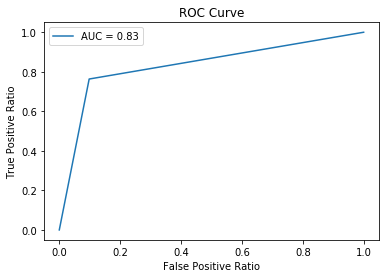

In [157]:
plt.title("ROC Curve")                                        # Putting title for graph 
plt.plot(fpr , tpr, label = "AUC = %0.2f" % roc_auc)   # ploting fpr, tpr, showing score of auc in label, color = red("r") 
plt.legend()                                                  # drawing a red line
plt.xlabel("False Positive Ratio")                            # X-axis label
plt.ylabel("True Positive Ratio")                             # Y-axis label  
plt.show()                                                    # Showing the graph  